# Dentro e los modelos no lineales, nos encontramos los Robust ¿iran mejor?

In [14]:

# plot line of best for multiple robust regression algorithms
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
import matplotlib. pyplot as plt
import math

In [15]:
dataset_train = pd.read_csv('../1.Limpieza_dataraw_inicial/Data_output/train_clean.csv', index_col=0)
dataset_train

,carat,cut,color,clarity,depth,table,price
0,1.12,5,3,3,61.6,59.0,5363
1,1.14,3,6,2,60.0,54.0,5593
2,0.90,3,7,2,60.3,63.0,3534
3,0.71,4,6,5,61.9,54.0,3212
4,0.34,3,5,2,60.0,62.0,447
...,...,...,...,...,...,...,...
40450,0.90,2,7,3,63.8,58.0,4120
40451,0.35,4,7,7,62.0,54.0,1266
40452,0.90,2,4,2,58.4,55.0,3269
40453,1.21,2,3,3,63.6,56.0,5893


In [16]:
X_train, X_test, y_train, y_test  = train_test_split(dataset_train.drop(columns="price"),dataset_train.price, test_size=0.2)
train_split=[X_train, X_test, y_train, y_test ]

In [17]:
robust_models = {
          "HuberRegressor":HuberRegressor(),
          "RANSACRegressor":RANSACRegressor(),
          "TheilSenRegressor":TheilSenRegressor()
          
         }


In [18]:
for name, model in robust_models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)

Training HuberRegressor
Training RANSACRegressor
Training TheilSenRegressor


In [19]:
def modelPredict(models, X_train, y_train, X_test, y_test):
    results = dict()
    for modelName, model in models.items():
        y_pred = model.predict(X_test)
        results[modelName] = y_pred
        r2 = r2_score(y_test, y_pred)
        print(f"{modelName}: r2 score = {round(r2, 4)}")
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        print(f"{modelName}: rmse = {round(rmse, 4)}")
    return results

In [21]:
y_predicts = modelPredict(robust_models,X_train, y_train, X_test, y_test)

HuberRegressor: r2 score = 0.8923
HuberRegressor: rmse = 1312.832
RANSACRegressor: r2 score = 0.8148
RANSACRegressor: rmse = 1721.573
TheilSenRegressor: r2 score = 0.8848
TheilSenRegressor: rmse = 1357.64


In [23]:
results = pd.DataFrame(y_predicts)
results["y_test"] = y_test.values
pd.DataFrame(results)

,HuberRegressor,RANSACRegressor,TheilSenRegressor,y_test
0,781.544815,813.674118,899.218980,778
1,-195.356544,93.929601,-137.657014,577
2,584.860604,927.784476,555.841394,1066
3,1096.272347,1414.575796,1091.134339,1208
4,341.714420,785.896331,386.813000,953
...,...,...,...,...
8086,696.042819,763.511513,875.279776,816
8087,1785.016294,1792.836576,1944.506755,1714
8088,5257.909963,4508.400641,5262.501408,3932
8089,7166.513644,6142.078913,6980.804349,9188


Como podemos observar tenemos un r2 y un rme peor 

Text(0.5, 0, 'RMSE:1357.64,r2 score = 0.8848 ')

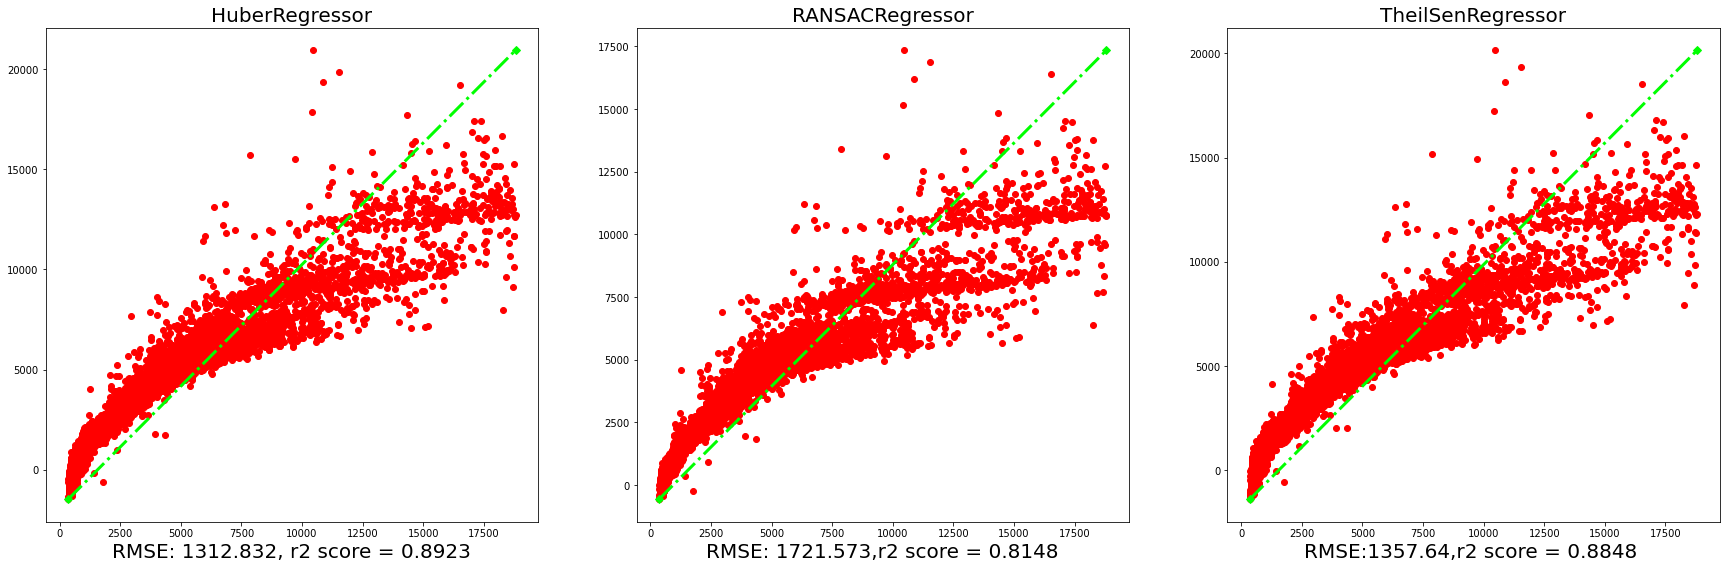

In [28]:
figures_alph_num = plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plt.scatter(y_test,results['HuberRegressor'],c='r')
plt.plot([y_test.min(), y_test.max()], [results['HuberRegressor'].min(), results['HuberRegressor'].max()], 'D-.',color='lime', lw=3)
plt.title('HuberRegressor', fontsize=20)
plt.xlabel('RMSE: 1312.832, r2 score = 0.8923', fontsize=20)

plt.subplot(2,3,2)
plt.scatter(y_test,results['RANSACRegressor'],c='r')
plt.plot([y_test.min(), y_test.max()], [results['RANSACRegressor'].min(), results['RANSACRegressor'].max()], 'D-.',color='lime', lw=3)
plt.title('RANSACRegressor', fontsize=20)
plt.xlabel('RMSE: 1721.573,r2 score = 0.8148', fontsize=20)

plt.subplot(2,3,3)
plt.scatter(y_test,results['TheilSenRegressor'],c='r')
plt.plot([y_test.min(), y_test.max()], [results['TheilSenRegressor'].min(), results['TheilSenRegressor'].max()], 'D-.',color='lime', lw=3)
plt.title('TheilSenRegressor', fontsize=20)
plt.xlabel('RMSE:1357.64,r2 score = 0.8848 ', fontsize=20)